# CS6220 Final Project

##  <pre>                       Wine Quality Prediction </pre>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sb

In [2]:
df=pd.read_csv('winequality-red.csv', sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# checking for any null values 
df.isnull().any() 

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

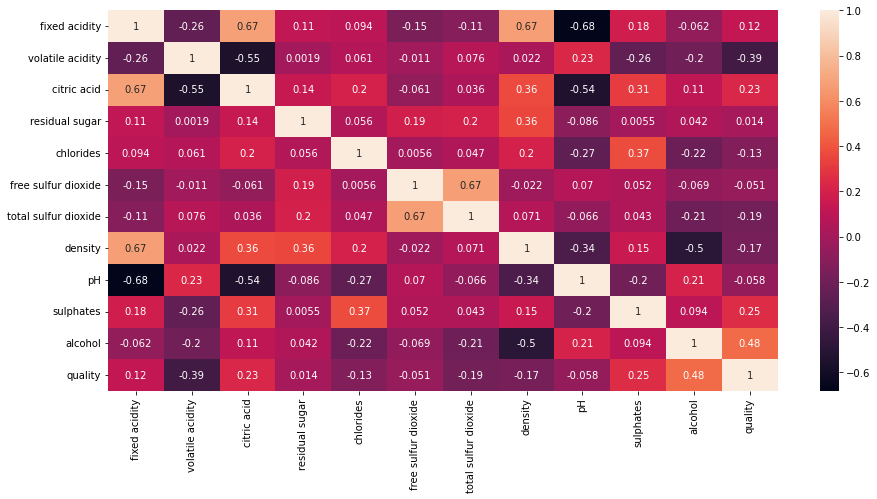

In [5]:
# correlation by visualization
plt.figure(figsize=[15,7])
# plot correlation
sb.heatmap(df.corr(),annot=True)
plt.show()

In [6]:
#preparing for linear regression based on all features
X = df[list(df.columns)[:-1]]
y=df['quality']

In [7]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
regr=LinearRegression()
regr.fit(X_train,y_train)
y_test_predict=regr.predict(X_test)
coef = regr.coef_
msq = mean_squared_error(y_test, y_test_predict)
vs = explained_variance_score(y_test, y_test_predict)
rS = regr.score(X_test,y_test)

print('Coefficients are {}'.format(coef))
print('')
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))


Coefficients are [ 4.49686382e-02 -1.15861035e+00 -9.80143791e-02  2.90226289e-02
 -1.52374822e+00  3.73764234e-03 -2.90814325e-03 -3.86505907e+01
 -1.81704163e-01  8.44582442e-01  2.54889650e-01]

Mean Squared Error is 0.4098821420148111
Explained variance score is 0.35171471841809265
R-score (Accuracy) is 0.3497865045883618


In [9]:
allFeaturesMSQ = []
allFeaturesVS = []
allFeaturesRS = []

#all features linear regression ran 10 times
for i in range (10):
    X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    regr=LinearRegression()
    regr.fit(X_train,y_train)
    y_test_predict=regr.predict(X_test)
    allFeaturesMSQ.append(mean_squared_error(y_test, y_test_predict))
    allFeaturesVS.append(explained_variance_score(y_test, y_test_predict))
    allFeaturesRS.append(regr.score(X_test, y_test))

msq = np.average(allFeaturesMSQ)
vs = np.average(allFeaturesVS)
rS = np.average(allFeaturesRS)
print("")
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))
print("")




Mean Squared Error is 0.4307344887702955
Explained variance score is 0.35207970856821913
R-score (Accuracy) is 0.3491503889583263



In [10]:
#linear regression based on alcohol 
X = pd.DataFrame(df['alcohol'])
y=df['quality']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

regr=LinearRegression()
regr.fit(X_train,y_train)
y_test_predict=regr.predict(X_test)
coef = regr.coef_
msq = mean_squared_error(y_test, y_test_predict)
vs = explained_variance_score(y_test, y_test_predict)
rS = regr.score(X_test,y_test)

print('Coefficients are {}'.format(coef))
print('')
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))

Coefficients are [0.3771117]

Mean Squared Error is 0.5529219549826936
Explained variance score is 0.1387373061261501
R-score (Accuracy) is 0.1335209324463179


In [11]:
#linear regression based on volatile acidity
X = pd.DataFrame(df['volatile acidity'])
y=df['quality']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

regr=LinearRegression()
regr.fit(X_train,y_train)
y_test_predict=regr.predict(X_test)
coef = regr.coef_
msq = mean_squared_error(y_test, y_test_predict)
vs = explained_variance_score(y_test, y_test_predict)
rS = regr.score(X_test,y_test)

print('Coefficients are {}'.format(coef))
print('')
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))

Coefficients are [-1.76953652]

Mean Squared Error is 0.5693859508338809
Explained variance score is 0.13908264250527136
R-score (Accuracy) is 0.13872132230280365


In [12]:
#preparing for linear regression based on volatile acidity, alchol
X = df[['volatile acidity','alcohol']]
y=df['quality']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

twoFeaturesMSQ = []
twoFeaturesVS = []
twoFeaturesRS = []

#all features linear regression ran 10 times
for i in range (10):
    X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    regr=LinearRegression()
    regr.fit(X_train,y_train)
    y_test_predict=regr.predict(X_test)
    twoFeaturesMSQ.append(mean_squared_error(y_test, y_test_predict))
    twoFeaturesVS.append(explained_variance_score(y_test, y_test_predict))
    twoFeaturesRS.append(regr.score(X_test, y_test))

msq = np.average(twoFeaturesMSQ)
vs = np.average(twoFeaturesVS)
rS = np.average(twoFeaturesRS)
print("")
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))
print("")



Mean Squared Error is 0.46529836774111477
Explained variance score is 0.32050546093601356
R-score (Accuracy) is 0.31752773950295143

